In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.preprocessing import OneHotEncoder
import hashlib
import os

In [2]:
# Data Wrangling
cfpd_survey_data_url = 'https://raw.githubusercontent.com/jeydion/capstone_project_2/master/NFWBS_PUF_2016_data.csv'
df = pd.read_csv(cfpd_survey_data_url, index_col =0)
df.head(10)

,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,...,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
PUF_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10350,2,3,5,5,6,55,3,3,3,3,2,3,2,3,2,4,44,3,3,4,3,3,3,4,4,3,4,5,4,3,1,5,4,4,3,4,4,2,4,4,...,62,-2,-2,4,-1,0,0,0,0,8,0,0,0,0,0,0,0,1,0,1,0,5,8,1,4,1,1,1,7,3,1,4,8,0,0,0,0,1,0,0.367292
7740,1,3,6,6,6,51,2,2,3,3,3,4,2,2,2,3,43,3,3,3,3,4,3,2,4,3,2,5,4,3,0,3,2,2,1,4,4,1,4,1,...,-2,66,90,2,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,2,1,1,2,6,3,1,2,3,0,0,0,0,2,0,1.327561
13699,1,3,4,3,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,5,3,3,1,4,4,4,4,3,3,3,3,5,...,-2,68,78,3,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,3,2,1,3,6,3,1,4,9,0,0,0,1,2,1,0.835156
7267,1,3,6,6,6,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,-1,-1,-1,-1,3,3,3,3,4,4,2,4,4,...,-2,-1,-1,-1,-1,0,0,0,0,99,0,0,0,0,0,0,0,0,1,-2,-1,-1,3,3,2,1,1,1,8,3,1,3,7,0,0,0,0,1,0,1.410871
7375,1,3,4,4,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,4,3,3,1,3,3,3,3,3,3,3,3,4,...,-2,65,75,2,1,0,0,0,0,2,0,1,0,1,0,0,0,0,0,-2,0,5,2,4,2,3,1,5,7,1,1,2,4,0,0,1,0,4,1,4.260668
10910,1,3,5,7,5,67,5,1,1,1,1,1,2,5,2,2,57,4,4,4,4,3,4,4,4,4,1,6,5,4,1,5,4,3,4,5,3,5,5,4,...,-2,71,10,4,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,-2,1,3,2,4,4,1,1,2,7,1,1,2,3,0,0,0,0,2,0,0.760061
11079,1,3,5,4,7,51,1,3,2,3,3,3,3,2,1,4,54,4,4,3,3,3,4,4,5,4,3,5,5,3,1,4,3,3,4,5,3,5,5,5,...,-2,63,70,4,0,0,2,1,1,4,0,0,0,1,0,0,0,0,0,-2,0,5,3,3,4,4,2,5,7,1,1,2,4,0,0,1,1,3,0,1.370522
7741,1,3,2,2,2,47,1,2,4,3,3,3,3,3,3,3,35,2,3,3,2,2,4,2,4,3,3,4,2,3,0,4,3,3,2,1,1,1,1,2,...,-2,71,0,2,1,0,0,0,0,7,0,0,0,0,0,0,1,0,0,-2,0,5,2,4,1,1,2,3,4,4,1,2,4,0,0,0,0,3,0,1.193365
8303,1,3,7,7,7,43,4,5,2,5,5,2,5,5,4,4,58,4,5,5,4,3,5,4,4,4,5,4,3,3,0,4,4,4,3,4,3,4,3,4,...,-2,70,50,2,0,0,0,1,1,4,0,0,0,1,0,0,0,0,0,-2,-1,-1,3,3,1,3,2,4,7,1,1,3,7,0,0,0,1,3,0,2.497838


In [3]:
df.describe()

,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,...,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,3.285737,2.771505,3.071942,2.335940,3.388176,2.029246,2.687989,50.719112,3.608383,3.535033,3.241164,3.316078,3.049578,3.762277,3.695809,3.739443,3.626056,2.670003,4.674069,4.213481,3.607288,0.621364,3.674226,3.625117,3.672036,3.254301,4.533000,3.807163,3.535033,4.204410,4.36894,...,15.361589,39.942759,64.409134,3.497498,0.478886,0.155145,0.143572,0.135283,0.196591,6.063341,0.083829,0.393338,0.089459,0.062715,0.041914,0.046450,0.042227,0.296997,0.018142,-0.912418,0.189084,4.471067,4.450422,2.549891,3.160776,1.622771,1.475759,2.522990,5.510635,2.042071,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,1.052283,1.269624,1.177299,1.178593,1.267983,1.105532,1.135752,12.656921,0.945685,1.055525,1.034077,0.964748,1.022757,0.953039,0.993908,0.891055,0.960579,0.928350,1.283933,0.904444,0.925751,0.509003,1.043434,0.949566,0.923921,1.027885,0.924622,1.084656,1.583223,1.071351,1.48672,...,29.064899,33.252065,36.608928,1.220841,0.659390,0.467310,0.439024,0.418555,0.521085,12.917475,0.277152,0.488529,0.285427,0.242469,0.200409,0.210474,0.201123,0.456971,0.133475,1.703731,0.411092,1.185524,2.120741,1.046740,1.178349,1.077631,0.499451,1.223571,2.671075,1.393808,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,-3.000000,-3.000000,-2.000000,-1.000000,-1.000000,-1.000000,-3.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 10350 to 8516
Columns: 216 entries, sample to finalwt
dtypes: float64(2), int64(214)
memory usage: 10.6 MB


In [0]:
# Data Cleaning
# This data set has already been cleaned but the CFPB to the needs of this project. From this point feature selection and and handling are next. 

In [0]:
# Feature Engineering
# The features that were chosen were based on the original problem being solved. There are 215 variables in the original dataset.
# Though all could be used to gain a more precise understanding of Financial Well-Being, those variables won't go far enough. 
# There are no variables directly tied to other aspects of the human experience /(psychological, body and mental health, socio-economic 
# descriptors of the participants place of residence). The features chosen specifically relate to the participant's score on the financial
# questions and their decriptive or panel data. This refers to the participants' race, age, generation, household size and income and 
# employment status. 

In [0]:
dc_df = df[["FWBscore", "FSscore", "FS1_1", "FS1_2", "FS1_3", "FS1_4", "FS1_5", "FS1_6", "FS1_7", "FS2_1", "FS2_2", "FS2_3", "SUBKNOWL1", "FK1correct",
            "FK2correct", "FK3correct", "KHscore", "KH1correct", "KH2correct", "KH3correct", "KH4correct", "KH5correct", "KH6correct",
            "KH7correct", "KH8correct", "KH9correct", "FINSOC2_1", "FINSOC2_2", "FINSOC2_3", "FINSOC2_4", "FINSOC2_5", "FINSOC2_6", 
            "FINSOC2_7", "KIDS_NoChildren", "KIDS_1", "KIDS_2", "KIDS_3", "KIDS_4", "EMPLOY", "EMPLOY1_1", "EMPLOY1_2", "EMPLOY1_3", "EMPLOY1_4", 
            "EMPLOY1_5", "EMPLOY1_6", "EMPLOY1_7", "EMPLOY1_8", "agecat", "generation", "PPEDUC", "PPETHM", 
            "PPGENDER", "PPHHSIZE", "PPINCIMP", "fpl", "PPMARIT"]]

In [8]:
dc_df.describe()

,FWBscore,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,FK1correct,FK2correct,FK3correct,KHscore,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,fpl,PPMARIT
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,56.034094,50.719112,3.608383,3.535033,3.241164,3.316078,3.049578,3.762277,3.695809,3.739443,3.626056,2.670003,4.674069,0.862997,0.77385,0.869409,-0.056935,0.604942,0.843603,0.671880,0.827964,0.747732,0.918361,0.439318,0.350798,0.899124,0.34157,0.649828,0.360651,0.604160,0.741789,0.398811,0.416171,0.478886,0.155145,0.143572,0.135283,0.196591,6.063341,0.083829,0.393338,0.089459,0.062715,0.041914,0.046450,0.042227,0.296997,4.450422,2.549891,3.160776,1.622771,1.475759,2.522990,5.510635,2.658899,2.042071
std,14.154676,12.656921,0.945685,1.055525,1.034077,0.964748,1.022757,0.953039,0.993908,0.891055,0.960579,0.928350,1.283933,0.343878,0.41837,0.336979,0.814936,0.488901,0.363259,0.469566,0.377441,0.434348,0.273835,0.496343,0.477257,0.301188,0.48115,0.483251,0.487340,0.495108,0.445127,0.496670,0.499893,0.659390,0.467310,0.439024,0.418555,0.521085,12.917475,0.277152,0.488529,0.285427,0.242469,0.200409,0.210474,0.201123,0.456971,2.120741,1.046740,1.178349,1.077631,0.499451,1.223571,2.671075,0.656944,1.393808
min,-4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.00000,0.000000,-2.053000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,48.000000,42.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,1.000000,1.00000,1.000000,-0.570000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000
50%,56.000000,50.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,1.000000,1.00000,1.000000,-0.188000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,3.000000,1.000000,1.000000,2.000000,6.000000,3.000000,1.000000
75%,65.000000,57.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,1.000000,1.00000,1.000000,0.712000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000

In [9]:
dc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 10350 to 8516
Data columns (total 56 columns):
FWBscore           6394 non-null int64
FSscore            6394 non-null int64
FS1_1              6394 non-null int64
FS1_2              6394 non-null int64
FS1_3              6394 non-null int64
FS1_4              6394 non-null int64
FS1_5              6394 non-null int64
FS1_6              6394 non-null int64
FS1_7              6394 non-null int64
FS2_1              6394 non-null int64
FS2_2              6394 non-null int64
FS2_3              6394 non-null int64
SUBKNOWL1          6394 non-null int64
FK1correct         6394 non-null int64
FK2correct         6394 non-null int64
FK3correct         6394 non-null int64
KHscore            6394 non-null float64
KH1correct         6394 non-null int64
KH2correct         6394 non-null int64
KH3correct         6394 non-null int64
KH4correct         6394 non-null int64
KH5correct         6394 non-null int64
KH6correct         6394 non-n

In [0]:
# Data Cleaning
# First need to delete all rows with nonsubstantive values. This is any row with values -4, -1, and 99. These rows won't be used because they won't have
# a complete data point for analysis. This should result in less than 1% of the data being removed. 

In [11]:
nsvalues = {
    -4: np.nan,
    -1: np.nan,
    99: np.nan
}
dc_df.replace(nsvalues, inplace=True)
# df.loc[:, (df == -4)] = np.nan
dc_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 10350 to 8516
Data columns (total 56 columns):
FWBscore           6389 non-null float64
FSscore            6386 non-null float64
FS1_1              6382 non-null float64
FS1_2              6383 non-null float64
FS1_3              6382 non-null float64
FS1_4              6384 non-null float64
FS1_5              6383 non-null float64
FS1_6              6384 non-null float64
FS1_7              6386 non-null float64
FS2_1              6380 non-null float64
FS2_2              6380 non-null float64
FS2_3              6380 non-null float64
SUBKNOWL1          6342 non-null float64
FK1correct         6394 non-null float64
FK2correct         6394 non-null float64
FK3correct         6394 non-null float64
KHscore            6394 non-null float64
KH1correct         6394 non-null float64
KH2correct         6394 non-null float64
KH3correct         6394 non-null float64
KH4correct         6394 non-null float64
KH5correct         6394 non-

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [12]:
dc_df.dropna(inplace=True)
dc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 7740 to 8516
Data columns (total 56 columns):
FWBscore           5670 non-null float64
FSscore            5670 non-null float64
FS1_1              5670 non-null float64
FS1_2              5670 non-null float64
FS1_3              5670 non-null float64
FS1_4              5670 non-null float64
FS1_5              5670 non-null float64
FS1_6              5670 non-null float64
FS1_7              5670 non-null float64
FS2_1              5670 non-null float64
FS2_2              5670 non-null float64
FS2_3              5670 non-null float64
SUBKNOWL1          5670 non-null float64
FK1correct         5670 non-null float64
FK2correct         5670 non-null float64
FK3correct         5670 non-null float64
KHscore            5670 non-null float64
KH1correct         5670 non-null float64
KH2correct         5670 non-null float64
KH3correct         5670 non-null float64
KH4correct         5670 non-null float64
KH5correct         5670 non-n

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
dc_df.head(10)

,FWBscore,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,FK1correct,FK2correct,FK3correct,KHscore,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,fpl,PPMARIT
PUF_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7740,51.0,43.0,3.0,3.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,2.0,5.0,1.0,1.0,1.0,-0.570,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,1.0,1.0,2.0,6.0,3.0,3.0
13699,49.0,42.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,1.0,1.0,1.0,-0.188,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,2.0,1.0,3.0,6.0,3.0,3.0
7375,49.0,42.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,0.0,0.0,1.0,-1.900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,3.0,1.0,5.0,7.0,3.0,1.0
10910,67.0,57.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,1.0,6.0,1.0,1.0,1.0,0.242,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,1.0,1.0,2.0,7.0,3.0,1.0
11079,51.0,54.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,4.0,3.0,5.0,1.0,1.0,1.0,1.267,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,4.0,2.0,5.0,7.0,3.0,1.0
7741,47.0,35.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,4.0,3.0,3.0,4.0,1.0,1.0,1.0,-0.909,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,1.0,1.0,2.0,3.0,4.0,3.0,4.0
8303,43.0,58.0,4.0,5.0,5.0,4.0,3.0,5.0,4.0,4.0,4.0,5.0,4.0,1.0,1.0,0.0,-0.188,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,3.0,2.0,4.0,7.0,3.0,1.0
13180,78.0,66.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,2.0,5.0,1.0,0.0,1.0,-0.188,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,1.0,5.0,6.0,3.0,1.0
10127,62.0,57.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,5.0,1.0,1.0,1.0,0.242,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,2.0,4.0,1.0,2.0,2.0,8.0,3.0,1.0


In [0]:
dw_df = dc_df.copy()

In [0]:
# One-Hot Encode discrete variables
encoder = OneHotEncoder(categories='auto')

cat_df = dw_df[["FS1_1", "FS1_2", "FS1_3", "FS1_4", "FS1_5", "FS1_6", "FS1_7", "FS2_1", "FS2_2", "FS2_3", "SUBKNOWL1",  "KHscore",  "KIDS_1", "KIDS_2", "KIDS_3", "KIDS_4", "EMPLOY1_1", "EMPLOY1_2", "EMPLOY1_3", "EMPLOY1_4",  "EMPLOY1_5", "EMPLOY1_6", "EMPLOY1_7", "EMPLOY1_8", "agecat", "generation", "PPEDUC", "PPETHM",  "PPGENDER", "PPHHSIZE", "PPINCIMP", "fpl", "PPMARIT"
]]

In [16]:
cat_df = cat_df.astype(str)
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 7740 to 8516
Data columns (total 33 columns):
FS1_1         5670 non-null object
FS1_2         5670 non-null object
FS1_3         5670 non-null object
FS1_4         5670 non-null object
FS1_5         5670 non-null object
FS1_6         5670 non-null object
FS1_7         5670 non-null object
FS2_1         5670 non-null object
FS2_2         5670 non-null object
FS2_3         5670 non-null object
SUBKNOWL1     5670 non-null object
KHscore       5670 non-null object
KIDS_1        5670 non-null object
KIDS_2        5670 non-null object
KIDS_3        5670 non-null object
KIDS_4        5670 non-null object
EMPLOY1_1     5670 non-null object
EMPLOY1_2     5670 non-null object
EMPLOY1_3     5670 non-null object
EMPLOY1_4     5670 non-null object
EMPLOY1_5     5670 non-null object
EMPLOY1_6     5670 non-null object
EMPLOY1_7     5670 non-null object
EMPLOY1_8     5670 non-null object
agecat        5670 non-null object
generation    5

In [17]:
#encoder.fit_transform(cat_df)
cat_df = pd.get_dummies(cat_df)
cat_df.head()

,FS1_1_1.0,FS1_1_2.0,FS1_1_3.0,FS1_1_4.0,FS1_1_5.0,FS1_2_1.0,FS1_2_2.0,FS1_2_3.0,FS1_2_4.0,FS1_2_5.0,FS1_3_1.0,FS1_3_2.0,FS1_3_3.0,FS1_3_4.0,FS1_3_5.0,FS1_4_1.0,FS1_4_2.0,FS1_4_3.0,FS1_4_4.0,FS1_4_5.0,FS1_5_1.0,FS1_5_2.0,FS1_5_3.0,FS1_5_4.0,FS1_5_5.0,FS1_6_1.0,FS1_6_2.0,FS1_6_3.0,FS1_6_4.0,FS1_6_5.0,FS1_7_1.0,FS1_7_2.0,FS1_7_3.0,FS1_7_4.0,FS1_7_5.0,FS2_1_1.0,FS2_1_2.0,FS2_1_3.0,FS2_1_4.0,FS2_1_5.0,...,agecat_6.0,agecat_7.0,agecat_8.0,generation_1.0,generation_2.0,generation_3.0,generation_4.0,PPEDUC_1.0,PPEDUC_2.0,PPEDUC_3.0,PPEDUC_4.0,PPEDUC_5.0,PPETHM_1.0,PPETHM_2.0,PPETHM_3.0,PPETHM_4.0,PPGENDER_1.0,PPGENDER_2.0,PPHHSIZE_1.0,PPHHSIZE_2.0,PPHHSIZE_3.0,PPHHSIZE_4.0,PPHHSIZE_5.0,PPINCIMP_1.0,PPINCIMP_2.0,PPINCIMP_3.0,PPINCIMP_4.0,PPINCIMP_5.0,PPINCIMP_6.0,PPINCIMP_7.0,PPINCIMP_8.0,PPINCIMP_9.0,fpl_1.0,fpl_2.0,fpl_3.0,PPMARIT_1.0,PPMARIT_2.0,PPMARIT_3.0,PPMARIT_4.0,PPMARIT_5.0
PUF_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7740,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
13699,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
7375,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
10910,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
11079,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0


In [0]:
# Convert Remaining Variables to their appropriate Data Types
# Convert float variables to int
int_df = dw_df[["FWBscore", "FSscore"]].astype(int)

In [0]:
# Convert boolean variables to int
bool_df = dw_df[["FK1correct", "FK2correct", "FK3correct", "KH1correct", "KH2correct", "KH3correct", "KH4correct", "KH5correct", "KH6correct",
            "KH7correct", "KH8correct", "KH9correct", "FINSOC2_1", "FINSOC2_2", "FINSOC2_3", "FINSOC2_4", "FINSOC2_5", "FINSOC2_6", 
            "FINSOC2_7", "KIDS_NoChildren"]].astype(int)

In [20]:
labels = [int_df, bool_df, cat_df]
eda_df = pd.concat(labels, axis=1)
eda_df.head(10)

,FWBscore,FSscore,FK1correct,FK2correct,FK3correct,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,KIDS_NoChildren,FS1_1_1.0,FS1_1_2.0,FS1_1_3.0,FS1_1_4.0,FS1_1_5.0,FS1_2_1.0,FS1_2_2.0,FS1_2_3.0,FS1_2_4.0,FS1_2_5.0,FS1_3_1.0,FS1_3_2.0,FS1_3_3.0,FS1_3_4.0,FS1_3_5.0,FS1_4_1.0,FS1_4_2.0,FS1_4_3.0,...,agecat_6.0,agecat_7.0,agecat_8.0,generation_1.0,generation_2.0,generation_3.0,generation_4.0,PPEDUC_1.0,PPEDUC_2.0,PPEDUC_3.0,PPEDUC_4.0,PPEDUC_5.0,PPETHM_1.0,PPETHM_2.0,PPETHM_3.0,PPETHM_4.0,PPGENDER_1.0,PPGENDER_2.0,PPHHSIZE_1.0,PPHHSIZE_2.0,PPHHSIZE_3.0,PPHHSIZE_4.0,PPHHSIZE_5.0,PPINCIMP_1.0,PPINCIMP_2.0,PPINCIMP_3.0,PPINCIMP_4.0,PPINCIMP_5.0,PPINCIMP_6.0,PPINCIMP_7.0,PPINCIMP_8.0,PPINCIMP_9.0,fpl_1.0,fpl_2.0,fpl_3.0,PPMARIT_1.0,PPMARIT_2.0,PPMARIT_3.0,PPMARIT_4.0,PPMARIT_5.0
PUF_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7740,51,43,1,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
13699,49,42,1,1,1,1,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
7375,49,42,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
10910,67,57,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
11079,51,54,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
7741,47,35,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8303,43,58,1,1,0,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
13180,78,66,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
10127,62,57,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0


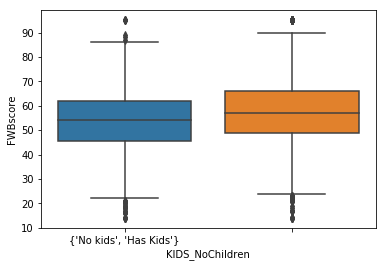

In [21]:
# EDA
# Plot charts comparing the FWBscore against the different socio-economic groupings

#Whether or Not participants have children
ax = sns.boxplot(x="KIDS_NoChildren", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1])
ax.set_xticklabels([{"No kids", "Has Kids"}])
plt.show()

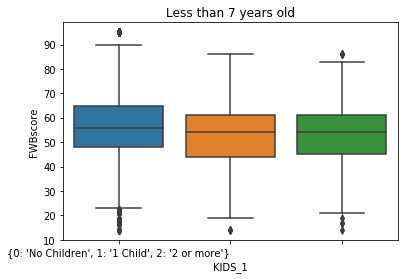

In [22]:
#_ = eda_df.plot(x="FWBscore", y=["EMPLOY1_1_1.0", "EMPLOY1_2_1.0", "EMPLOY1_3_1.0", "EMPLOY1_4_1.0", "EMPLOY1_5_1.0", "EMPLOY1_6_1.0", "EMPLOY1_7_1.0",
#                    "EMPLOY1_8_1.0"], kind="bar")
#_ = sns.boxplot(x="variable", y="value", data=pd.melt(df))
ax = sns.boxplot(x="KIDS_1", y="FWBscore", data=dc_df)
plt.title("Less than 7 years old")
ax.set(xticklabels=[{0: "No Children", 1: "1 Child", 2: "2 or more"}])
plt.show()




[[Text(0, 0, "{0: 'No Children', 1: '1 Child', 2: '2 or more'}")]]

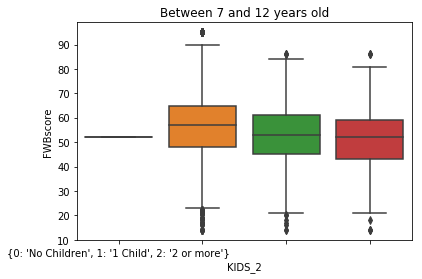

In [23]:
ax = sns.boxplot(x="KIDS_2", y="FWBscore", data=dc_df)
plt.title("Between 7 and 12 years old")
ax.set(xticklabels=[{0: "No Children", 1: "1 Child", 2: "2 or more"}])

[[Text(0, 0, "{0: 'No Children', 1: '1 Child', 2: '2 or more'}")]]

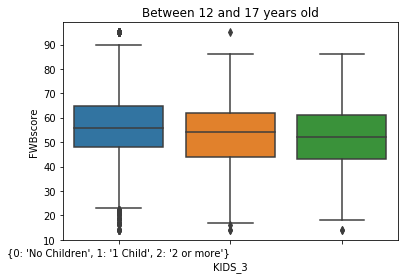

In [24]:
ax = sns.boxplot(x="KIDS_3", y="FWBscore", data=dc_df)
plt.title("Between 12 and 17 years old")
ax.set(xticklabels=[{0: "No Children", 1: "1 Child", 2: "2 or more"}])

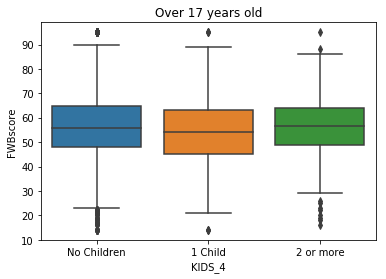

In [25]:
ax = sns.boxplot(x="KIDS_4", y="FWBscore", data=dc_df)
plt.title("Over 17 years old")
ax.set(xticks=[0, 1, 2])
ax.set(xticklabels=["No Children", "1 Child", "2 or more"])
plt.show()

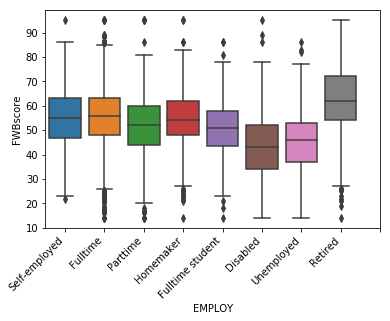

In [26]:
# Employment
ax = sns.boxplot(x="EMPLOY", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xticklabels(["Self-employed", "Fulltime", "Parttime", "Homemaker", "Fulltime student", "Disabled", "Unemployed", "Retired"], rotation=45, ha='right')
plt.show()

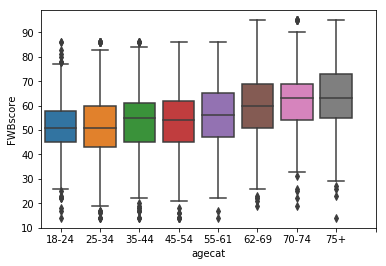

In [27]:
# Age Category
ax = sns.boxplot(x="agecat", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xticklabels(["18-24", "25-34", "35-44", "45-54", "55-61", "62-69", "70-74", "75+"])
plt.show()

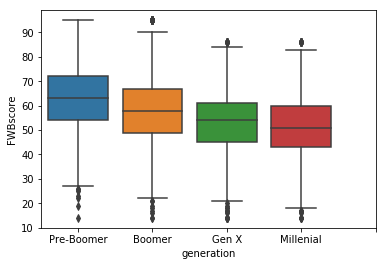

In [28]:
# Generation
ax = sns.boxplot(x="generation", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4])
ax.set_xticklabels(["Pre-Boomer", "Boomer", "Gen X", "Millenial"])
plt.show()

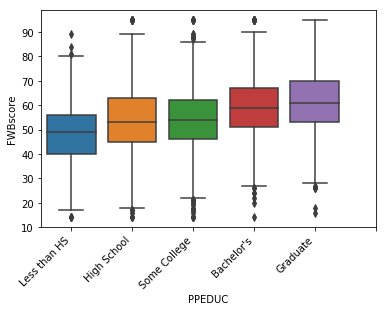

In [29]:
# Participant Education Level
ax = sns.boxplot(x="PPEDUC", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5])
ax.set_xticklabels(["Less than HS", "High School", "Some College", "Bachelor's", "Graduate"], rotation=45, ha='right')
plt.show()

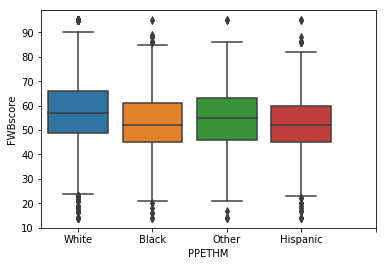

In [30]:
# Participant Ethnicity
ax = sns.boxplot(x="PPETHM", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4])
ax.set_xticklabels(["White", "Black", "Other", "Hispanic"])
plt.show()

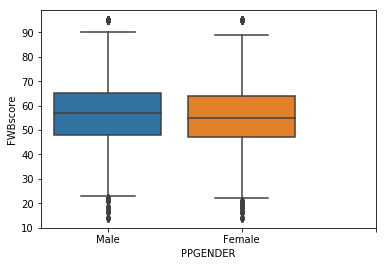

In [31]:
# Participant Gender
ax = sns.boxplot(x="PPGENDER", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2])
ax.set_xticklabels(["Male", "Female"])
plt.show()

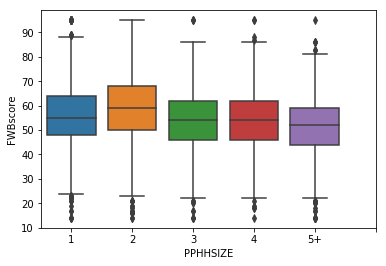

In [32]:
# Participant Household Size
ax = sns.boxplot(x="PPHHSIZE", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5])
ax.set_xticklabels(["1", "2", "3", "4", "5+"])
plt.show()

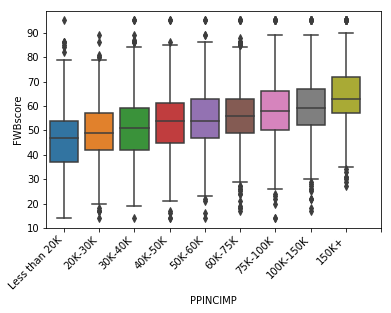

In [33]:
# Participant Income
ax = sns.boxplot(x="PPINCIMP", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(["Less than 20K", "20K-30K", "30K-40K", "40K-50K", "50K-60K", "60K-75K", "75K-100K", "100K-150K", "150K+"], rotation=45, ha='right')
plt.show()

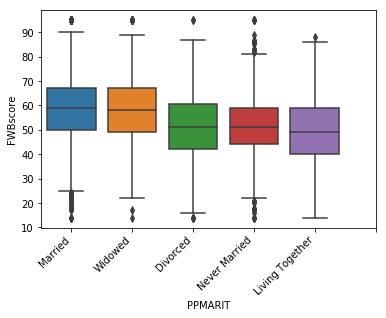

In [34]:
# Participant Maritial Status
ax = sns.boxplot(x="PPMARIT", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5])
ax.set_xticklabels(["Married", "Widowed", "Divorced", "Never Married", "Living Together"], rotation=45, ha='right')
plt.show()

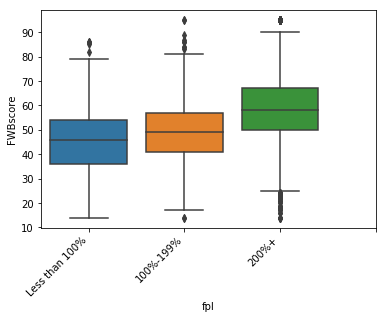

In [35]:
# Percent of Federal Poverty Line
ax = sns.boxplot(x="fpl", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3])
ax.set_xticklabels(["Less than 100%", "100%-199%", "200%+"], rotation=45, ha='right')
plt.show()

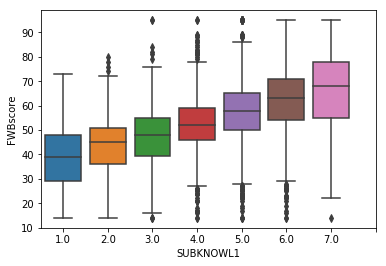

In [36]:
#Compare Financial literacy categorical variables to FWB score
#SBKNOWL1: Participant selected financial knowledge assessment
ax = sns.boxplot(x="SUBKNOWL1", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5, 6, 7])
# ax.set_xticklabels(["Less than 100%", "100%-199%", "200%+"], rotation=45, ha='right')
plt.show()

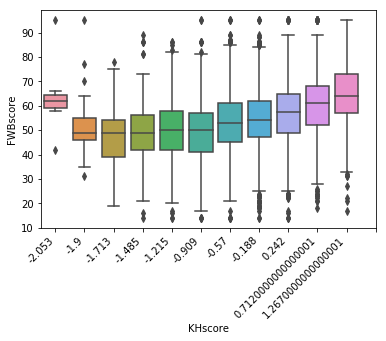

In [37]:
#KHscore: Knoll and Houts financial literacy test score
#NOTE: Though the test is administered as a continuous variable, for the sake of the survey the results have been compiled into a discrete variable.
# the values of the scores are essentially from low financial knowledge to high financial knowledge
ax = sns.boxplot(x="KHscore", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.xticks(rotation=45, ha='right')
plt.show()

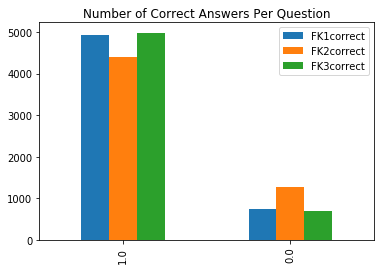

In [38]:
#FK1Correct - FK3Correct: The proportion of correct answers to a financial literacy questionnaire
FKCorrect_df = dc_df[["FK1correct", "FK2correct", "FK3correct"]].copy()
FKCorrect_df.apply(pd.value_counts).plot(kind='bar', title='Number of Correct Answers Per Question')
ax.set(xticks=[1, 0])
ax.set_xticklabels(["Correct", "Incorrect"])
plt.show()
#FKCorrect_df

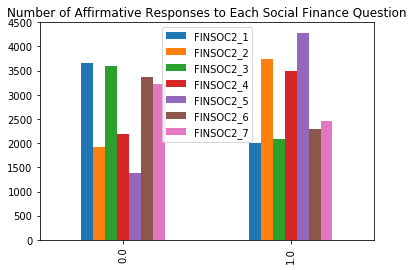

In [39]:
#FINSOC2_1 - FINSOC2_7: Financial knowledge either gained or passed on to members of the participants' social circle
FINSOC_df = dc_df[["FINSOC2_1", "FINSOC2_2", "FINSOC2_3", "FINSOC2_4", "FINSOC2_5", "FINSOC2_6", 
            "FINSOC2_7"]].copy()
FINSOC_df.apply(pd.value_counts).plot(kind='bar', title='Number of Affirmative Responses to Each Social Finance Question')
plt.show()

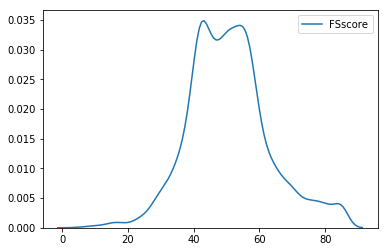

In [40]:
#FSscore
ax = sns.kdeplot(dc_df["FSscore"])
plt.show()

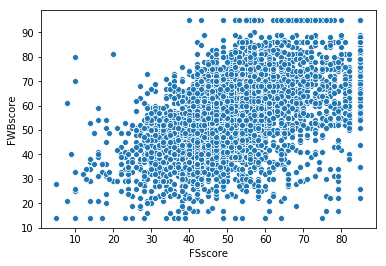

In [41]:
# FSscore
# Pearson correlation
ax = sns.scatterplot(x="FSscore", y="FWBscore", data=dc_df)
plt.show()

In [0]:
# Pearson correlation
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [43]:
pearsonr(dc_df.FWBscore, dc_df.FSscore)

(0.4954809467219192, 0.0)

In [44]:
# Feature Comparison and Selection
dc_df.corr()

,FWBscore,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,FK1correct,FK2correct,FK3correct,KHscore,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,fpl,PPMARIT
FWBscore,1.000000,0.495481,0.472070,0.417130,0.315975,0.385250,0.354488,0.423396,0.497766,0.179516,0.189500,-0.332737,0.394468,0.117997,0.176948,0.144766,0.326844,0.235585,0.128374,0.218625,0.101973,0.106560,0.153909,0.157911,0.145842,0.117493,0.065627,0.156229,0.091304,0.123148,0.178699,0.125024,0.120833,0.120518,-0.082891,-0.100754,-0.088435,-0.015015,0.163333,-0.019505,-0.043692,-0.077385,-0.044829,-0.081541,-0.182306,-0.159602,0.302740,0.313883,-0.293148,0.258399,-0.139425,-0.047079,-0.144818,0.385197,0.337421,-0.246118
FSscore,0.495481,1.000000,0.862204,0.697491,0.756774,0.827605,0.730794,0.723502,0.778530,0.520587,0.506918,-0.441905,0.629263,0.105956,0.077807,0.046363,0.192288,0.136240,0.050460,0.122963,0.074559,0.067655,0.066905,0.104484,0.100157,0.047510,0.157808,0.165997,0.140446,0.170478,0.180571,0.107526,0.137228,0.009489,0.026648,-0.024966,-0.034206,-0.000572,0.008543,0.033811,0.024200,-0.040185,-0.024695,-0.029826,-0.099427,-0.091476,0.077826,0.056181,-0.046645,0.210450,-0.068983,-0.066407,-0.048493,0.213937,0.160404,-0.112570
FS1_1,0.472070,0.862204,1.000000,0.548807,0.602583,0.643004,0.542311,0.646537,0.697810,0.349043,0.338061,-0.342012,0.513174,0.091260,0.096538,0.045317,0.189805,0.130938,0.059463,0.113226,0.066426,0.072847,0.080718,0.109273,0.084692,0.048025,0.106660,0.136124,0.107633,0.136778,0.162390,0.089863,0.103039,0.018814,0.005294,-0.046317,-0.037307,0.014348,0.056425,0.012167,-0.006543,-0.050097,-0.018515,-0.039691,-0.091818,-0.108358,0.130347,0.115291,-0.102264,0.185666,-0.070832,-0.034019,-0.073758,0.192719,0.164169,-0.125362
FS1_2,0.417130,0.697491,0.548807,1.000000,0.529740,0.567373,0.550671,0.460458,0.508307,0.332631,0.417281,-0.288794,0.485866,0.107450,0.077908,0.052854,0.195621,0.137662,0.070824,0.127030,0.100331,0.075206,0.070419,0.086954,0.096041,0.060039,0.158017,0.177288,0.139684,0.161815,0.187382,0.140040,0.148963,0.057974,-0.008888,-0.069253,-0.059307,-0.018010,0.047962,0.035269,-0.011291,-0.019359,-0.050420,-0.017626,-0.091957,-0.099334,0.120612,0.098754,-0.091178,0.191014,-0.126567,-0.042130,-0.073832,0.219936,0.191331,-0.104529
FS1_3,0.315975,0.756774,0.602583,0.529740,1.000000,0.711263,0.668406,0.464689,0.505629,0.277722,0.264315,-0.439866,0.609001,0.070014,0.037193,0.017876,0.128631,0.104493,0.005739,0.069476,0.033122,0.040453,0.018651,0.065883,0.106429,0.020598,0.128632,0.110646,0.123584,0.126472,0.129384,0.073834,0.094438,-0.029404,0.044399,0.010483,-0.004468,0.004034,-0.017863,0.057336,0.040830,-0.053290,-0.040104,-0.049618,-0.061300,-0.064346,0.043501,0.031854,-0.021791,0.162936,-0.023353,-0.126308,-0.018722,0.140472,0.098707,-0.090350
FS1_4,0.385250,0.827605,0.643004,0.567373,0.711263,1.000000,0.667816,0.517773,0.566460,0.319831,0.304158,-0.400657,0.588030,0.087607,0.050180,0.054064,0.140353,0.107559,0.019123,0.095266,0.046255,0.035785,0.048181,0.075311,0.086146,0.027535,0.152932,0.143480,0.139829,0.149048,0.150276,0.105833,0.132698,0.005820,0.036025,0.000555,-0.027087,-0.012958,-0.024230,0.046009,0.050609,-0.047499,-0.027142,-0.011860,-0.081939,-0.076164,0.033641,0.010219,0.003718,0.180407,-0.046817,-0.103439,-0.026064,0.184590,0.139044,-0.089080
FS1_5,0.354488,0.730794,0.542311,0.550671,0.668406,0.667816,1.000000,0.425459,0.481457,0.290258,0.283799,-0.402858,0.579208,0.076878,0.036670,0.035757,0.135641,0.119923,0.007835,0.090744,0.038184,0.039216,0.014858,0.068552,0.097848,0.024346,0.173495,0.136843,0.154103,0.160485,0.161290,0.103818,0.115510,-0.017909,0.030147,-0.004389,-0.017815,0.00

In [0]:
fs_df = dc_df[["FWBscore", "FSscore", "SUBKNOWL1", "FK1correct", "FK2correct", "FK3correct", "KHscore", "FINSOC2_1", "FINSOC2_2", "FINSOC2_3", 
               "FINSOC2_4", "FINSOC2_5", "FINSOC2_6", "FINSOC2_7", "KIDS_NoChildren", "KIDS_1", "KIDS_2", "KIDS_3", "KIDS_4", "EMPLOY1_1", 
               "EMPLOY1_2", "EMPLOY1_3", "EMPLOY1_4", "EMPLOY1_5", "EMPLOY1_6", "EMPLOY1_7", "EMPLOY1_8", "agecat", "generation", "PPEDUC", 
               "PPETHM", "PPGENDER", "PPHHSIZE", "PPINCIMP", "fpl", "PPMARIT"]]

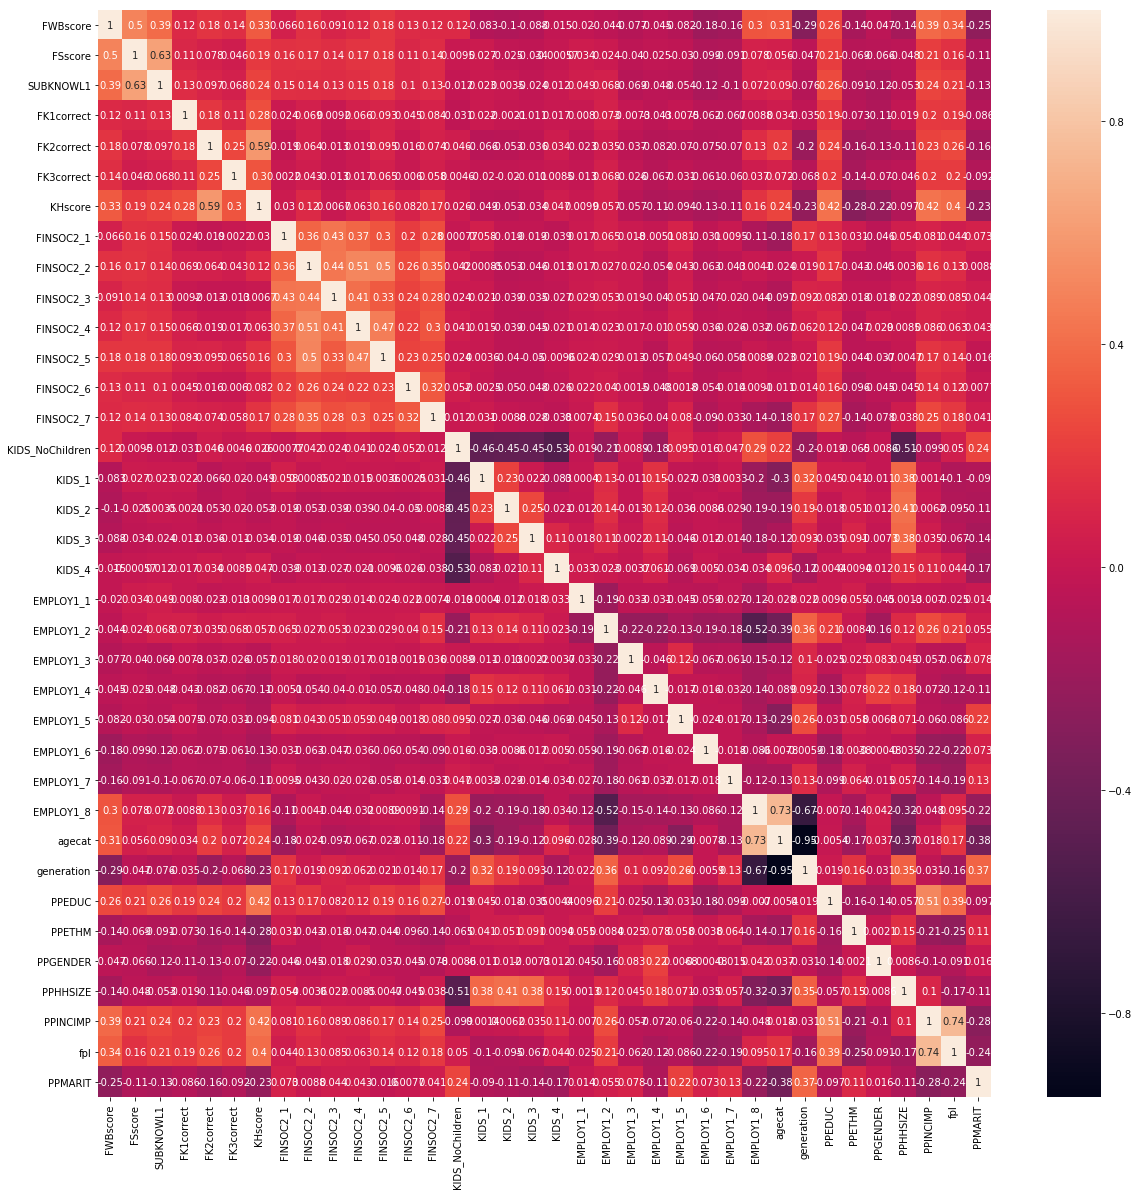

In [53]:
ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(fs_df.corr(), annot=True)

In [45]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

NameError: ignored

In [0]:
3r